- KEYWORDS: energy balance, cstr


![img](//s-media-cache-ak0.pinimg.com/736x/55/fb/94/55fb940fd2c3c7cbb6a6106aa9365ea8.jpg)

# The energy balance and the CSTR

-   There are flows in the CSTR
-   The mole balance in a CSTR is

$\frac{dN_j}{dt} = F_{j0} - F_j + r_j V = F_{j0} - F_j + \alpha_j r V $

-   Let us again assume constant pressure, and neglect shaft work
-   The beginning energy balance becomes

\begin{equation}
\sum N_j C_{p,j} \frac{dT}{dt} = -\sum H_j (F_{j0} - F_j + \alpha_j r V) + \sum F_{j0} H_{j_in} - \sum F_j H_j + \dot{Q}
\end{equation}

-   With some rearrangement, and recognizing that
    -   $\Delta H_{rx} = \sum \alpha_j H_j $
    -   $H_{j0} - H_{j} = C_{p,j}(T_0 - T) $
-   We arrive at

\begin{equation}\label{eq:EB-cstr}
\sum N_j C_{p,j} \frac{dT}{dt} = \sum F_{j0} C_{p,j} (T_0 - T) - \Delta H_{rx} r V + \dot{Q}
\end{equation}

-   At steady state, this simplifies to

$0 = \sum F_{j0} C_{p,j} (T_0 - T) - \Delta H_{rx} r V + \dot{Q} $

## Steady state adiabatic CSTR

-   Let us consider an adiabatic CSTR where a liquid phase isomerization occurs

$A \rightarrow B$

-   We feed the reactor 163 kmol / hr of a mixture of 90% A and 10% inert C
-   The initial concentration of A is 9.3 mol / L at a feed temperature of 330 K
-   The equilibrium constant is 3.03 at 60 \degC
-   The reaction energy is -6.9 kJ / mol at 330K
-   The heat capacities are

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">species</th>
<th scope="col" class="org-right">heat capacity (J/mol/K)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">A</td>
<td class="org-right">141</td>
</tr>


<tr>
<td class="org-left">B</td>
<td class="org-right">141</td>
</tr>


<tr>
<td class="org-left">C</td>
<td class="org-right">161</td>
</tr>
</tbody>
</table>

-   the rate constant is 31.1 1/hr at 330 K, with an activation energy of 65.7 kJ/mol
-   We want to know the volume required to reach 70% conversion and the exit temperature.
-   We will solve the mole balance and energy balance simultaneously
-   The mole balance is the same as before

$0 = F_{A0} - F_A + r_A V $

-   The energy balance in this case is

$0 = \sum F_{j0} C_{p,j} (T_{feed} - T) - \Delta H_{rx}(T) r V $
We start with a lot of data.

In [1]:
import numpy as np

R = 8.314e-3      # gas constant kJ/mol/K

Hrx = -6.900      # Reaction enthalpy kJ/mol at 330 K

Tfeed = 330.0     # Feed temperature in K
k1 = 31.1         # Rate constant at 360 K
T1 = 360.0        # Reference T for the rate constant
E = 65.7          # Activation energy
Kc1 = 3.03        # at 60degC
T2 = 273.15 + 60  # Reference T for the equilibrium constant

Cao = 9300.0      # initial concentration mol / m**3
Fto = 163000.0    # Total molar feed rate mol / hour
Fao = 0.9 * Fto   # inlet molar flow of A
Fbo = 0.0 * Fto
Fio = 0.1 * Fto

CpA = 0.141       # heat capacity kJ / mol / K
CpB = 0.141
dCp = CpB - CpA   # change in heat capacity due to reaction

CpI = 0.161

X = 0.7           # fractional conversion
Ca = Cao * (1.0 - X)
Cb = Cao * X

Fa = Fao * (1.0 - X)

We have two equations to solve, and they depend on $V$ and $T$.

In [1]:
def objective(Y):
    V, T = Y  # unpack the variables

    # Calculate reaction energy at reaction conditions
    Hrxn = Hrx + dCp * (T - Tfeed)

    k = k1 * np.exp(-E / R * (1.0 / T - 1.0 / T1))
    Kc = Kc1 * np.exp(-Hrxn / R * ( 1.0 / T - 1.0 / T2))

    r = k * (Ca - Cb / Kc)
    ra = -r
    # mole balance
    z1 = Fao - Fa + ra * V

    # energy balance
    z2 = (Fao * CpA + Fbo * CpB + Fio * CpI) * (Tfeed - T) + (-Hrxn * r * V)
    return [z1, z2]

from scipy.optimize import fsolve

V, Texit = fsolve(objective, [16.42, 360])
print('Volume = {0:1.2f} m^3'.format(V))
print('The exit temperature is {0:1.2f} K'.format(Texit))

Volume = 16.43 m^3
The exit temperature is 360.40 K

-   You can see that the exit stream is hotter than the feed temperature
    -   That is because the reaction is mildly exothermic, so heat is generated
    -   The reactor is adiabatic, so the temperature goes up

-   Note that this was an exothermic, reversible reaction

-   We should have checked if a conversion of 70% is even possible

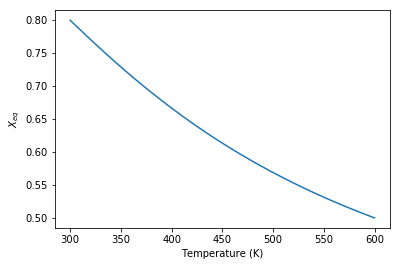

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Hrx = -6.9   # kJ / mol
R = 8.314e-3
K_ref = 3.03
T_ref = 273.15 + 60

T = np.linspace(300, 600)

K = K_ref * np.exp(-Hrx / R * (1.0 / T - 1.0 / T_ref))

Xeq = K / (1.0 + K)

plt.plot(T, Xeq)
plt.xlabel('Temperature (K)')
plt.ylabel('$X_{eq}$')

-   You can see that a conversion of 70% is only possible below a temperature of about 360 K

## Multiple steady states in a nonisothermal adiabatic CSTR

-   In solving non-isothermal reactor design problems, we have coupled nonlinear equations
-   It may be possible for there to be multiple solutions
-   For example, a high temperature may lead to a high rate and a low volume to achieve some conversion
-   Alternatively, at a low temperature, a higher volume may be required to get the same conversion
-   Let us consider this adiabatic CSTR setup

![img](./images/adiabatic-cstr-setup.png)

-   We want to see how the solution to this design, i.e. the exit conversion and temperature depends on the parameters
    -   Primarily we are interested in the feed temperature in this example
-   Rather than solve the problem numerically like we did in the last problem, we will illustrate a graphical approach to solving the problem
-   The idea is that if we specify the temperature, we can compute the conversion independently from the mole and energy balance
-   Then we can plot the two conversions to see where they are equal
-   This will also show whether there is one or more solutions in the temperature interval

In [1]:
V = 40.1              # ft**3
vo = (233.1+2*46.62)  # ft**3/hr

Fao = 43.04           # lbmol/hr
Fbo = 802.8           # lbmol/hr
Fmo = 71.87           # lbmol/hr

Cao = Fao/vo

# reaction barrier
A = 16.96e12          # 1/hr
E = 32400.0           # BTU/(lbmol)
R = 1.987             # BTU/(lbmol*R)

# thermal data
Cpa = 35.0            # BTU/(lbmol*R)
Cpb = 18.0            # BTU/(lbmol*R)
Cpc = 46.0            # BTU/(lbmol*R)
Cpm = 19.5            # BTU/(lbmol*R)
Ha = -66600.0         # BTU/(lbmol)
Hb = -123000.0        # BTU/(lbmol)
Hc = -226000.0        # BTU/(lbmol)
Tr = 527.67           # reference temperature for enthalpy in R
Hrx_TR = Hc - Hb - Ha
deltaCp = Cpc - Cpa - Cpb

Tfeed = 534.0         # Feed temperature in Rankine

In [1]:
Tspan = np.linspace(Tfeed, Tfeed + 100.0) # temperature in Rankine
XMB = np.empty(Tspan.shape)
XEB = np.empty(Tspan.shape)

for i, T in enumerate(Tspan):
    # compute temperature dependent reaction properties
    k = A * np.exp(-E / (R * T))
    Hrx = Hrx_TR + deltaCp * (T - Tr)

    def MB(X):
        Ca = Cao * (1.0 - X)
        r = k * Ca
        ra = -r
        z = Fao - vo * Ca + ra * V
        return z

    XMB[i], = fsolve(MB, 0.1)

    def EB(X):
        'the energy balance'
        Ca = Cao * (1.0 - X)
        Fa = vo*Ca
        rV = (Fa - Fao) / -1
        # using k * Ca * V should also work, but it does not
        z = ((Fao * Cpa
            + Fbo * Cpb
            + Fmo * Cpm) * (Tfeed - T)
             + (-Hrx * rV))
        return z

    XEB[i], = fsolve(EB, 0.91)

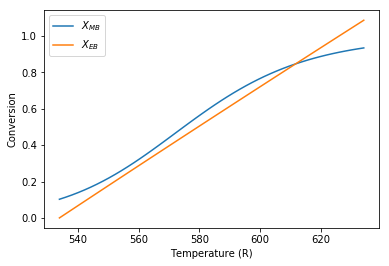

In [1]:
plt.plot(Tspan, XMB)
plt.plot(Tspan, XEB)
plt.xlabel('Temperature (R)')
plt.ylabel('Conversion')
plt.legend(['$X_{MB}$', '$X_{EB}$'], loc='best')

-   There is a solution near T = 614R (that is where the curves intersect)
    -   That is where the exit conversion is the same from the mole and energy balance

-   Curiously, if the energy balance was shifted to the left, it appears there would be more than one solution!

-   The position of the line from the energy balance is determined by the feed temperature.

-   Let us consider two cooler feed temperatures which will shift the energy balance

-   Here we use a loop to solve for three different feed temperatures

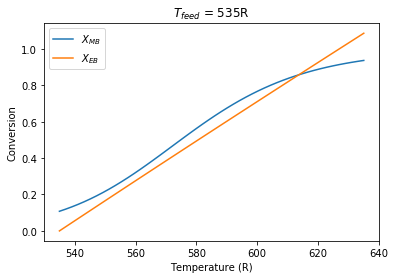

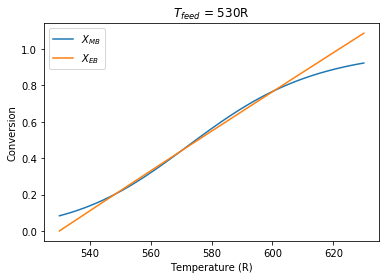

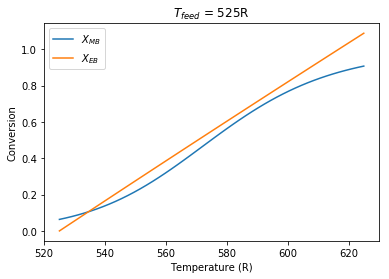

In [1]:
for Tfeed in [535.0, 530.0, 525.0]:
    Tspan = np.linspace(Tfeed, Tfeed + 100.0) # temperature in Rankine
    XMB = np.empty(Tspan.shape)
    XEB = np.empty(Tspan.shape)

    for i, T in enumerate(Tspan):
        # compute temperature dependent reaction properties
        k = A * np.exp(-E / (R * T))
        Hrx = Hrx_TR + deltaCp * (T - Tr)

        def MB(X):
            Ca = Cao * (1.0 - X)
            r = k * Ca
            ra = -r
            z = Fao - vo * Ca + ra * V
            return z

        XMB[i], = fsolve(MB, 0.1)

        def EB(X):
            Ca = Cao * (1.0 - X)
            Fa = Ca * vo
            rV = (Fa - Fao) / (-1)
            z = ((Fao * Cpa
                + Fbo * Cpb
                + Fmo * Cpm) * (Tfeed - T) + (-Hrx * rV))
            return z

        XEB[i], = fsolve(EB, 0.1)

    plt.figure()
    plt.plot(Tspan, XMB, Tspan, XEB)
    plt.xlabel('Temperature (R)')
    plt.ylabel('Conversion')
    plt.legend(['$X_{MB}$', '$X_{EB}$'], loc='best')
    plt.title('$T_{{feed}}$ = {0:1.0f}R'.format(Tfeed))

-   At 535 R as we saw before there is only one steady state solution

-   If we cool the feed just a little, there are three steady state solutions at low, medium and high conversion, with corresponding temperatures

-   At an even lower feed temperature we see only one, low conversion solution

-   An important question is which solution do you get? And is that solution stable?

-   The answer to that lies in the transient behavior of the CSTR

## Transient adiabatic CSTR

-   We have to consider the transient energy balance and how it couples to the mole balances
-   For an adiabatic reactor the energy balance becomes

$  \frac{dT}{dt} = \frac{\sum F_{j0} C_{p,j} (T_0 - T) - \Delta H_{rx} r V}{\sum N_j C_{p,j}} $

-   Let us consider the conversion-temperature trajectories for a series of feed temperatures between 525 and 535R

Here is the mole/energy balance:

In [1]:
def adiabatic_cstr(Y, t, Tfeed):
    Na, Nb, Nc, T = Y
    k = A * np.exp(-E / (R * T))

    Ca = Na / V
    Cb = Nb / V
    Cc = Nc / V

    r = k * Ca
    ra = -r
    rb = -r
    rc = r

    Fa = Ca * vo
    Fb = Cb * vo
    Fc = Cc * vo

    dNadt = Fao - Fa + ra * V
    dNbdt = Fbo - Fb + rb * V
    dNcdt = Fco - Fc + rc * V

    Hrx = Hrx_TR + deltaCp * (T - Tr)

    # intermediate variable for denominator of energy balance
    nCp = V * (Ca * Cpa
             + Cb * Cpa
             + Cc * Cpc
             + Cm * Cpm)

    dTdt = ((Fao * Cpa + Fbo * Cpb + Fmo * Cpm)*(Tfeed - T)
             -Hrx * r * V)/nCp

    return [dNadt, dNbdt, dNcdt, dTdt]

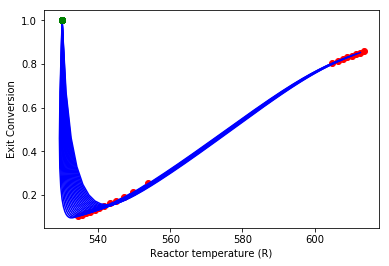

In [1]:
Fco = 0.0
Fmo = 71.87
Cm = Fmo / vo
Y0 = [0, V * 3.45, 0, 530]

from scipy.integrate import odeint
tspan = np.linspace(0, 25, 500) # hour

for Tfeed in np.linspace(525, 535, 20):
    sol = odeint(adiabatic_cstr, Y0, tspan, args=(Tfeed,))

    X = (Cao - sol[:,0] / V) / Cao
    T = sol[:,-1]
    plt.plot(T, X, 'b-')
    plt.plot([T[0]], [X[0]], 'go')   # beginning point
    plt.plot([T[-1]], [X[-1]], 'ro') # ending point

plt.xlabel('Reactor temperature (R)')
plt.ylabel('Exit Conversion')

-   The first thing to note here is that the conversion of 1 at the beginning is not meaningful
    -   This is an artifact of the definition
    -   Only steady state conversion is meaningful
    -   Since the tank starts out empty, it appears the conversion is 100%
    -   However, C\_A changes because A is flowing into the reactor *and* because of the reaction

-   It appears that there are two groups of solutions
    -   One at low temperature and low conversion
    -   One at high temperature and high conversion
    -   There are no solutions in the middle region

-   To address the question of stability, we examine the rates that heat is generated and removed around each steady state

## Stability of steady state solutions

-   To understand the stability of a steady state solution, we consider the rate that heat is generated and removed from the CSTR
-   Let us define the rate that heat is removed as $R(T) = \sum F_{j0} C_{p,j} (T_0 - T)$
    -   This term will be linear in $T$
-   The rate that heat is generated is $G(T) = - \Delta H_{rx} r V$
-   At steady state we have from the mole balance for $r = k C_A$

$ 0 = C_{A0} - C_A - k C_A \tau $

-   We solve this to get

$ C_A = \frac{C_{A0}}{1 + k(T) \tau} $

-   Substitution of this into $G(T)$ leads to:

$G(T) = -\Delta H_{rx} k C_A V = \frac{-\Delta H_{rx} k(T) C_{A0} V}{1 + k(T) \tau} $

-   This will be nonlinear in $T$
-   Let us consider these functions around the steady state solutions

Let's make sure the data is correct by redefining it:

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

V = 40.1                # ft**3
vo = (233.1 + 2*46.62)  # ft**3/hr
tau = V / vo

Fao = 43.04           # lbmol/hr
Fbo = 802.8           # lbmol/hr
Fmo = 71.87           # lbmol/hr

Cao = Fao/vo

# reaction barrier
A = 16.96e12          # 1/hr
E = 32400.0           # BTU/(lbmol)
R = 1.987             # BTU/(lbmol*R)

# thermal data
Cpa = 35.0            # BTU/(lbmol*R)
Cpb = 18.0            # BTU/(lbmol*R)
Cpc = 46.0            # BTU/(lbmol*R)
Cpm = 19.5            # BTU/(lbmol*R)
Ha = -66600.0         # BTU/(lbmol)
Hb = -123000.0        # BTU/(lbmol)
Hc = -226000.0        # BTU/(lbmol)
Tr = 527.67           # reference temperature for enthalpy in R
Hrx_TR = Hc - Hb - Ha
deltaCp = Cpc - Cpa - Cpb

Tfeed = 530.0

Now we plot it.

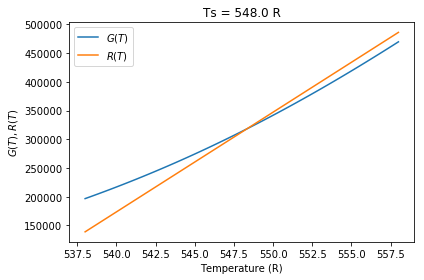

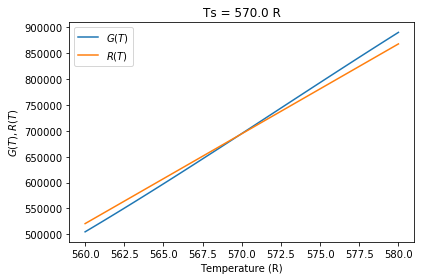

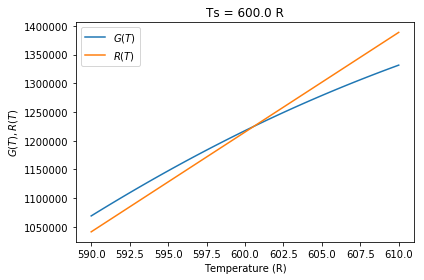

In [1]:
for Ts in [548.0, 570.0, 600.0]:  # approximate solutions
    Tspan = np.linspace(Ts - 10.0, Ts + 10.0) # temperature in Rankine
    GT = np.empty(Tspan.shape)
    RT = np.empty(Tspan.shape)

    for i, T in enumerate(Tspan):
        # compute temperature dependent reaction properties
        k = A * np.exp(-E / (R * T))
        Hrx = Hrx_TR + deltaCp * (T - Tr)

        RT[i]=  -((Fao * Cpa
                + Fbo * Cpb
                + Fmo * Cpm) * (Tfeed - T))

        GT[i] =  -Hrx * k * Cao * V / (1.0 + k * tau)

    plt.figure()
    plt.plot(Tspan, GT, Tspan, RT)
    plt.title('Ts = {} R'.format(Ts))
    plt.xlabel('Temperature (R)')
    plt.ylabel('$G(T),R(T)$')
    plt.legend(['$G(T)$', '$R(T)$'], loc='best')
    plt.tight_layout()

-   Let us consider the lowest temperature solution first

-   We need to consider what happens if there is a small perturbation in temperature from the steady state solution
-   At steady state the rate of heat generation is equal to the rate of heat removal

-   Suppose there is a small perturbation to a higher temperature
    -   The figure above shows that the rate of heat removal will be higher than the rate of heat generation
    -   This will lead to a cooling back to a new steady state solution

-   If instead there was a small perturbation to a lower temperature
    -   The rate of heat removal will be lower than the rate of heat generation
    -   This will lead to a heating of the reactor that will lead back to a new steady state solution

-   Together these observations lead to the conclusion that the low temperature solution is *stable* to small temperature fluctuations

-   Now let us consider the high temperature solution

-   Suppose there is a small perturbation to a higher temperature
    -   The figure above shows that the rate of heat removal will be higher than the rate of heat generation
    -   This will lead to a cooling back to a new steady state solution

-   If instead there was a small perturbation to a lower temperature
    -   The rate of heat removal will be lower than the rate of heat generation
    -   This will lead to a heating of the reactor that will lead back to a new steady state solution

-   Together these observations lead to the conclusion that the high temperature solution is *stable* to small temperature fluctuations

-   Finally we consider the middle solution

-   Suppose the reactor happened to be at this steady state

-   Suppose there is a small perturbation to a higher temperature
    -   The figure above shows that the rate of heat removal will be lower than the rate of heat generation
    
    -   This will lead to a heating of the reactor
    
    -   Heating will lead to a faster reaction rate, which will further increase the generation of heat
    
    -   The reaction will *runaway* until it reaches the higher temperature steady state solution

-   If instead there was a small perturbation to a lower temperature
    -   The rate of heat removal will be higher than the rate of heat generation
    
    -   This will lead to a cooling of the reactor and further slowing of the heat generation term
    
    -   The reactor will continue to cool until the lower temperature steady state solution is reached

-   Together these observations lead to the conclusion that the middle temperature solution is *unstable* to small temperature fluctuations

-   In fact the lower temperature solution is only stable to *small* perturbations
    -   If the perturbation were large enough the reactor could "flip" to the high temperature solution
    
    -   There could be safety concerns about this if the high temperature results in boil off, degradation, etc&#x2026;